# Lec 1

In [1]:

import warnings

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
sns.set_theme('notebook', 'whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("data/buenos_aires1.csv", encoding = "cp1252")
data

,type,country,region,lat,lon,price_usd,area_m2,floor,rooms,expenses,property_url
0,apartment,Argentina,Capital Federal,-34.604783,-58.458681,180000.0,110.0,NaN,4.0,NaN,http://villa-crespo.properati.com.ar/12egq_ven...
1,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.649700,-58.658073,410000.0,220.0,NaN,NaN,NaN,http://castelar-moron.properati.com.ar/11vgn_v...
2,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.595709,-58.566950,180000.0,135.0,NaN,5.0,NaN,http://tres-de-febrero.properati.com.ar/7f7u_v...
3,apartment,Argentina,Capital Federal,-34.584651,-58.454693,129000.0,70.0,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
4,house,Argentina,Bs.As. G.B.A. Zona Oeste,-34.655209,-58.697320,130000.0,140.0,NaN,NaN,NaN,http://ituzaingo-bs-as-g-b-a-zona-oeste.proper...
...,...,...,...,...,...,...,...,...,...,...,...
4827,apartment,Argentina,Bs.As. G.B.A. Zona Oeste,-34.601062,-58.566101,54000.0,31.0,10.0,2.0,NaN,http://caseros.properati.com.ar/vbya_venta_dep...
4828,apartment,Argentina,Bs.As. G.B.A. Zona Norte,-34.492839,-58.495680,85000.0,27.0,6.0,NaN,NaN,http://martinez.properati.com.ar/11cqc_venta_d...
4829,house,Argentina,Bs.As. G.B.A. Zona Norte,-34.356741,-58.796701,1600000.0,600.0,NaN,NaN,NaN,http://bs-as-g-b-a-zona-norte.properati.com.ar...
4830,house,Argentina,Capital Federal,-34.612354,-58.387462,190000.0,115.0,NaN,NaN,NaN,http://san-nicolas.properati.com.ar/zzpa_venta...


## EDA & Wrangling

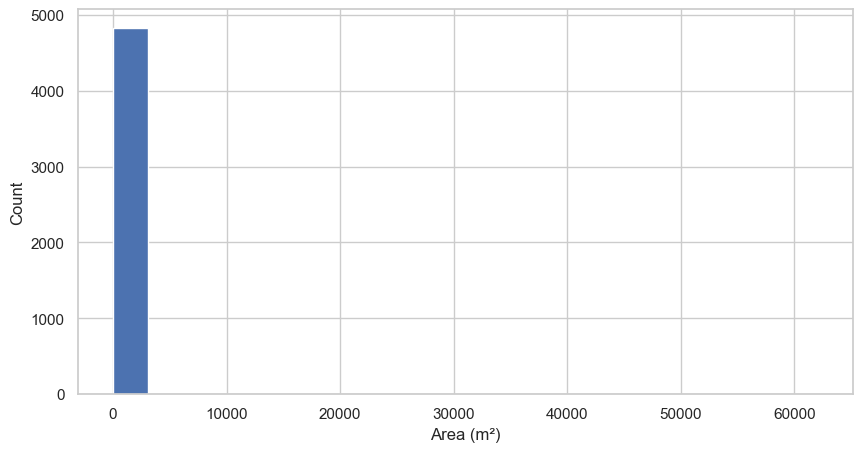

In [3]:
data.area_m2.plot(kind="hist",
                  xlabel="Area (m²)", 
                  ylabel="Count", 
                  bins=20, 
                  figsize=(10, 5));

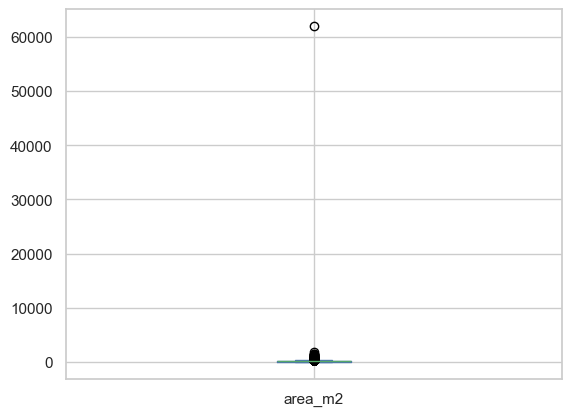

In [4]:
data.area_m2.plot(kind="box");

In [5]:
lo,high =data.area_m2.quantile([0.1,0.9])
data = data[data.area_m2.between(lo,high)]

high = data.price_usd.quantile(0.97)
data = data [data.price_usd.between(0,high)]


data = data[['type', 'country', 'region', 'lat', 'lon', 'area_m2', 'price_usd']]
df = data.reset_index(drop=True)
df.region = df.region.str.replace('Bs.As. G.B.A. ','')

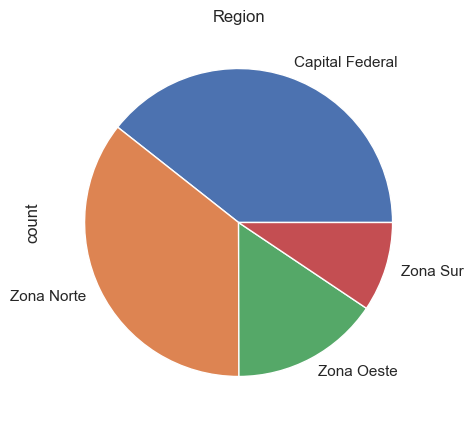

In [6]:
df.region.value_counts().plot(kind="pie",  
               title="Region",
               figsize=(10, 5));

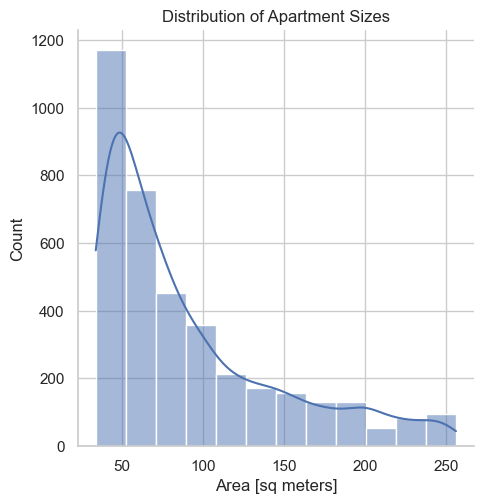

In [7]:
sns.displot(data = df,
           x = 'area_m2',
           kde = True,
           bins = 12)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

<Axes: >

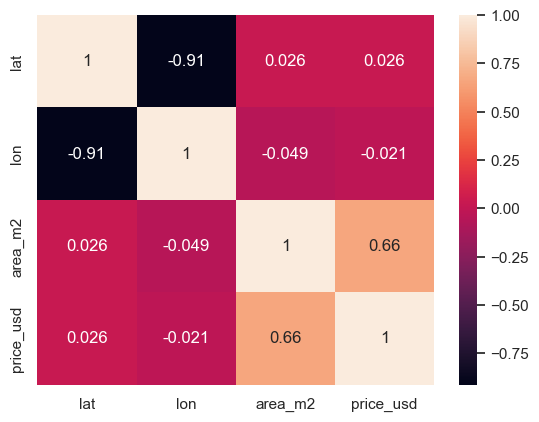

In [8]:
sns.heatmap(df.iloc[:,3:].corr(), annot=True)

## Sampling: Stratified

In [9]:
# Stratified sampling
df.groupby('region').sample(frac=1)

,type,country,region,lat,lon,area_m2,price_usd
817,apartment,Argentina,Capital Federal,-34.607092,-58.430617,35.0,86000.00
2309,house,Argentina,Capital Federal,-34.561417,-58.461335,238.0,425000.00
352,house,Argentina,Capital Federal,-34.637556,-58.463511,80.0,189000.00
3369,apartment,Argentina,Capital Federal,-34.622340,-58.408532,59.0,149000.00
2434,apartment,Argentina,Capital Federal,-34.643274,-58.373569,46.0,68000.00
...,...,...,...,...,...,...,...
2893,apartment,Argentina,Zona Sur,-34.702805,-58.380286,45.0,65000.00
3392,apartment,Argentina,Zona Sur,-34.931612,-57.998972,106.0,78923.48
1215,house,Argentina,Zona Sur,-34.933013,-57.998276,70.0,110000.00
1816,house,Argentina,Zona Sur,-34.810083,-58.397173,220.0,210000.00


In [10]:
# Calculate the number of datapoints to be sampled in each strata
n = df['region'].value_counts().min()

# Sample each strata
sample = df.groupby('region', 
                        group_keys=False).apply(lambda 
                                                x: x.sample(n))

sample = sample.reset_index(drop=True)
sample.index += 1

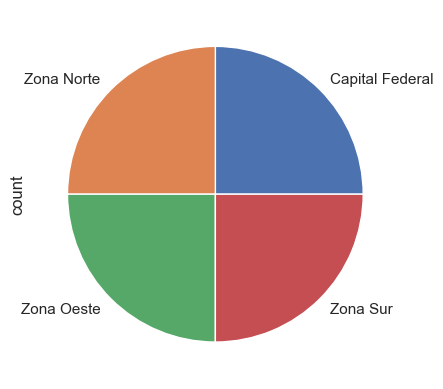

In [11]:
sample.region.value_counts().plot(kind="pie");

In [12]:
sample

,type,country,region,lat,lon,area_m2,price_usd
1,apartment,Argentina,Capital Federal,-34.624943,-58.416152,70.0,130000.0
2,apartment,Argentina,Capital Federal,-34.617762,-58.383662,34.0,82000.0
3,apartment,Argentina,Capital Federal,-34.599711,-58.401065,125.0,249500.0
4,apartment,Argentina,Capital Federal,-34.629559,-58.451769,60.0,180000.0
5,apartment,Argentina,Capital Federal,-34.603714,-58.381581,93.0,310000.0
...,...,...,...,...,...,...,...
1416,apartment,Argentina,Zona Sur,-34.703842,-58.385664,50.0,80000.0
1417,apartment,Argentina,Zona Sur,-34.703950,-58.390758,45.0,95000.0
1418,house,Argentina,Zona Sur,-34.783490,-58.210205,70.0,65000.0
1419,apartment,Argentina,Zona Sur,-34.713660,-58.394201,51.0,85000.0


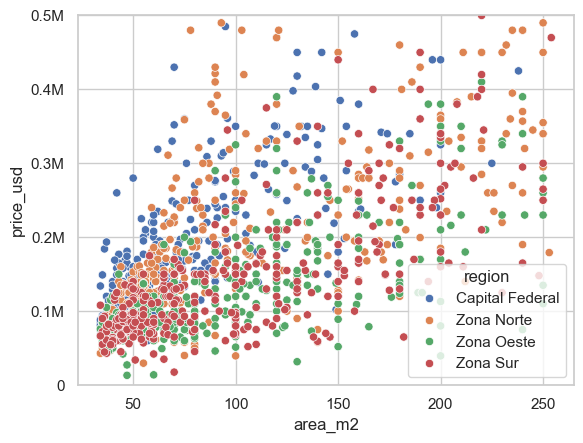

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax);
ax.set_ylim(0,500000);
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

plt.yticks([0,100000,200000,300000,400000,500000]);

## Modelling

### Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(sample['area_m2'],
                                             sample['price_usd'],
                                             test_size=0.2,
                                             random_state=69)

In [15]:
xTrain = pd.DataFrame(xTrain).rename({0:'area_m2'},axis=1)
xTest = pd.DataFrame(xTest).rename({0:'area_m2'},axis=1)

### Baseline

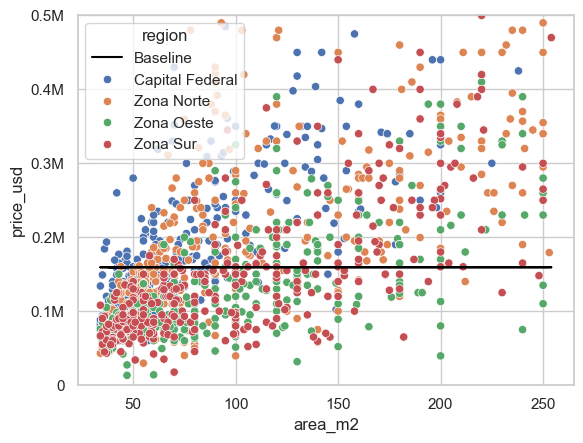

In [16]:
modelBs = np.full_like(yTrain, np.mean(yTrain))


fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

In [17]:
error = mean_absolute_error(yTrain,modelBs)
error2 = mean_absolute_error(yTest,np.full_like(yTest, np.mean(yTrain)))
f'error for training - {round(error,2)} || error for test data - {round(error2,2)}'

'error for training - 74058.65 || error for test data - 74389.27'

### Iteration & Final LR Model

In [18]:
# Initialize the model
model = LinearRegression()

In [19]:
model.fit(xTrain,yTrain)

LinearRegression()

In [20]:
LRerror = mean_absolute_error(yTrain,model.predict(xTrain))
LRerror2 = mean_absolute_error(yTest,model.predict(xTest))
f'error for training - {round(LRerror,2)} || error for test data - {round(LRerror2,2)}'

'error for training - 51682.36 || error for test data - 54703.24'

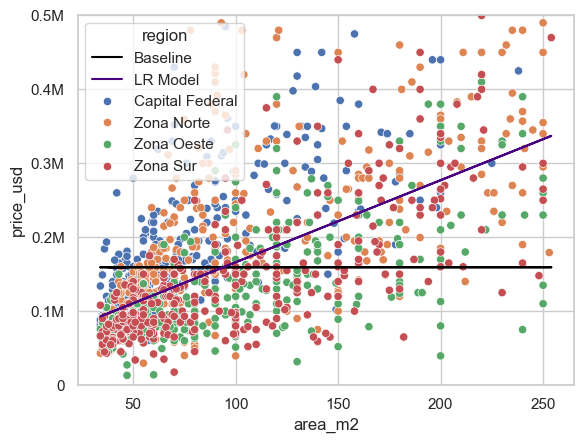

In [21]:
# Visualising the model
fig, ax = plt.subplots()
plt.plot(xTrain.squeeze(),modelBs,color='black',label='Baseline')
plt.plot(xTrain.squeeze(),model.predict(xTrain),color='indigo',label='LR Model')
sns.scatterplot(data=sample.squeeze(), 
                x="area_m2", 
                y="price_usd", 
                hue="region",
                ax=ax)
ax.set_ylim(0,500000)
ax.set_yticklabels([0,'0.1M','0.2M','0.3M','0.4M','0.5M']);

# Lec 2

In [22]:
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted

## Summing Up Lesson 1

In [23]:

def wrangleNsample(filepath):
    data = pd.read_csv(filepath)
    
    lo,high =data.area_m2.quantile([0.1,0.9])
    data = data[data.area_m2.between(lo,high)]
    high = data.price_usd.quantile(0.97)
    data = data [data.price_usd.between(0,high)]


    data = data[['type', 'country', 'region', 'lat', 'lon', 'area_m2', 'price_usd']]
    df = data.reset_index(drop=True)
    df.region = df.region.str.replace('Bs.As. G.B.A. ','')

    # Calculate the number of datapoints to be sampled in each strata
    n = df['region'].value_counts().min()

    # Sample each strata
    sample = df.groupby('region', 
                            group_keys=False).apply(lambda 
                                                    x: x.sample(n))

    sample = sample.reset_index(drop=True)
    sample.index += 1
    
    return sample

In [24]:
sample2 = wrangleNsample("data/buenos_aires2.csv")
sample2

,type,country,region,lat,lon,area_m2,price_usd
1,apartment,Argentina,Capital Federal,-34.553796,-58.456811,38.0,94000.0
2,apartment,Argentina,Capital Federal,-34.624430,-58.374183,46.0,108962.0
3,apartment,Argentina,Capital Federal,-34.621167,-58.460485,76.0,210000.0
4,apartment,Argentina,Capital Federal,-34.597769,-58.426440,49.0,169000.0
5,apartment,Argentina,Capital Federal,-34.551488,-58.463507,73.0,259000.0
...,...,...,...,...,...,...,...
1588,apartment,Argentina,Zona Sur,-34.907963,-57.946622,36.0,65000.0
1589,apartment,Argentina,Zona Sur,-34.706622,-58.385468,43.0,80000.0
1590,house,Argentina,Zona Sur,-34.808698,-58.404600,270.0,400000.0
1591,house,Argentina,Zona Sur,-34.722550,-58.399394,140.0,210000.0


## Dataset for the Lesson

In [25]:
df2 = pd.concat([sample,sample2],ignore_index=True)
df2

,type,country,region,lat,lon,area_m2,price_usd
0,apartment,Argentina,Capital Federal,-34.624943,-58.416152,70.0,130000.0
1,apartment,Argentina,Capital Federal,-34.617762,-58.383662,34.0,82000.0
2,apartment,Argentina,Capital Federal,-34.599711,-58.401065,125.0,249500.0
3,apartment,Argentina,Capital Federal,-34.629559,-58.451769,60.0,180000.0
4,apartment,Argentina,Capital Federal,-34.603714,-58.381581,93.0,310000.0
...,...,...,...,...,...,...,...
3007,apartment,Argentina,Zona Sur,-34.907963,-57.946622,36.0,65000.0
3008,apartment,Argentina,Zona Sur,-34.706622,-58.385468,43.0,80000.0
3009,house,Argentina,Zona Sur,-34.808698,-58.404600,270.0,400000.0
3010,house,Argentina,Zona Sur,-34.722550,-58.399394,140.0,210000.0


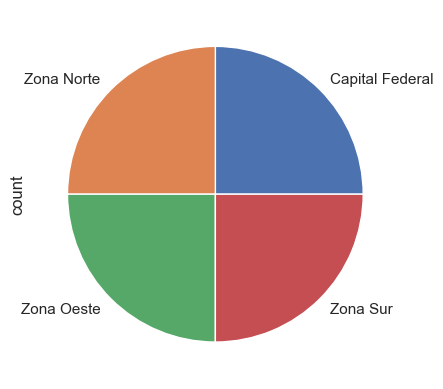

In [26]:
df2.region.value_counts().plot(kind="pie");

In [27]:
# Visualisation
fig = px.scatter_mapbox(
    df2,  # Our DataFrame
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color='price_usd',
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## Modelling through Pipeline

In [28]:
features = ["lon", "lat"]
X_train = df2[features]

target = "price_usd"
y_train = df2[target]

y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

mae_baseline = mean_absolute_error(y_train,y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 162106.82
Baseline MAE: 75047.69


In [29]:
imputer = SimpleImputer()
imputer.fit(X_train)
XT_train = imputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     3012 non-null   float64
 1   lat     3012 non-null   float64
dtypes: float64(2)
memory usage: 47.2 KB


In [30]:
model2 = make_pipeline(
    SimpleImputer(),
    LinearRegression())
    

In [31]:
model2.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [32]:
y_pred_training = model2.predict(X_train)
mae_training = mean_absolute_error(y_train,y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 74991.46


In [33]:
intercept = model2.named_steps['linearregression'].intercept_.round(2)
coefficients = model2.named_steps['linearregression'].coef_.round(2)
print(
    
    f"price = {intercept} + ({coefficients[0]} * longitude) + ({coefficients[1]} * latitude)"
)

price = 143049.13 + (-699.67 * longitude) + (634.84 * latitude)
